In [11]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
# will need to run: pip install quandl
import quandl
from fredapi import Fred 
import plotly.express as px
import plotly.graph_objects as go

from pathlib import Path
import panel as pn
from panel.interact import interact
pn.extension("plotly")

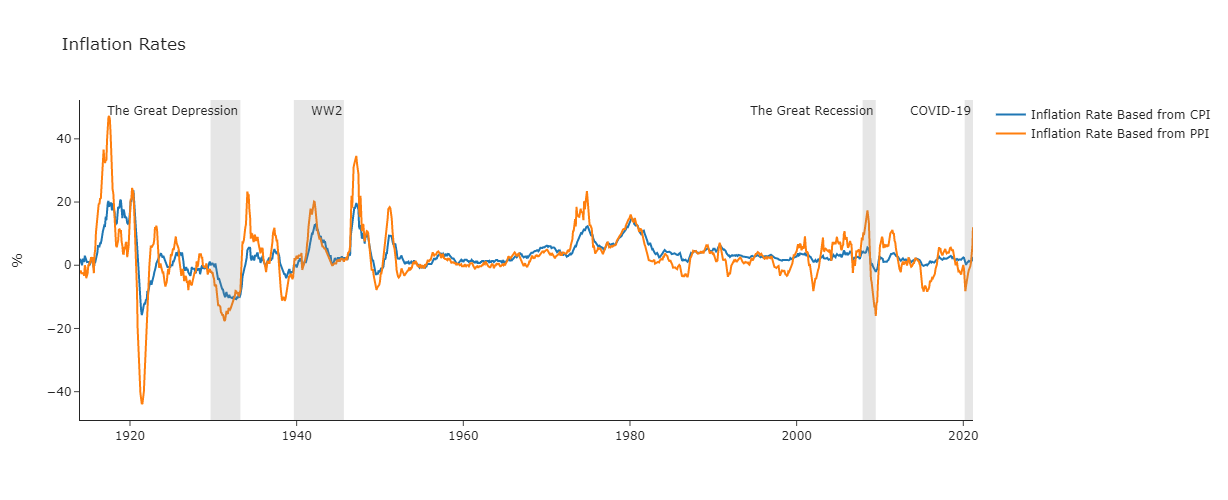

In [12]:
#import consumer price data from quandl API. Imports directly as a DataFrame
CPI = quandl.get("RATEINF/CPI_USA")
PPI = quandl.get("FRED/PPIACO")

# Convert CPI/PPI into inflation rate. Calculates the change in CPI/PPI (compared to the same month in the prior year). For example: March 2021 Inflation Rate = (March 2021 CPI - March 2020 CPI)/March 2020 CPI
inflation_rate_cpi = (CPI - CPI.shift(12))/CPI.shift(12)
inflation_rate_cpi.index = inflation_rate_cpi.index.strftime('%Y-%m')
inflation_rate_cpi.index = pd.to_datetime(inflation_rate_cpi.index)
inflation_rate_ppi = (PPI - PPI.shift(12))/PPI.shift(12)

# Drop Nulls and set column headers
inflation_rate_cpi = inflation_rate_cpi.dropna()
inflation_rate_cpi.columns = ['Inflation Rate CPI']
inflation_rate_cpi['Inflation Rate CPI'] = inflation_rate_cpi['Inflation Rate CPI']*100
inflation_rate_ppi = inflation_rate_ppi.dropna()
inflation_rate_ppi.columns = ['Inflation Rate PPI']
inflation_rate_ppi['Inflation Rate PPI'] = inflation_rate_ppi['Inflation Rate PPI']*100

# Make a plotly graph_objects "Figure" and then add the inflation Rate Lines
inflation_rates_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="%"), title = "Inflation Rates", height = 500)
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_cpi.index, y=inflation_rate_cpi["Inflation Rate CPI"],mode='lines', name="Inflation Rate Based from CPI"))
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_ppi.index, y=inflation_rate_ppi["Inflation Rate PPI"],mode='lines',name="Inflation Rate Based from PPI"))
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

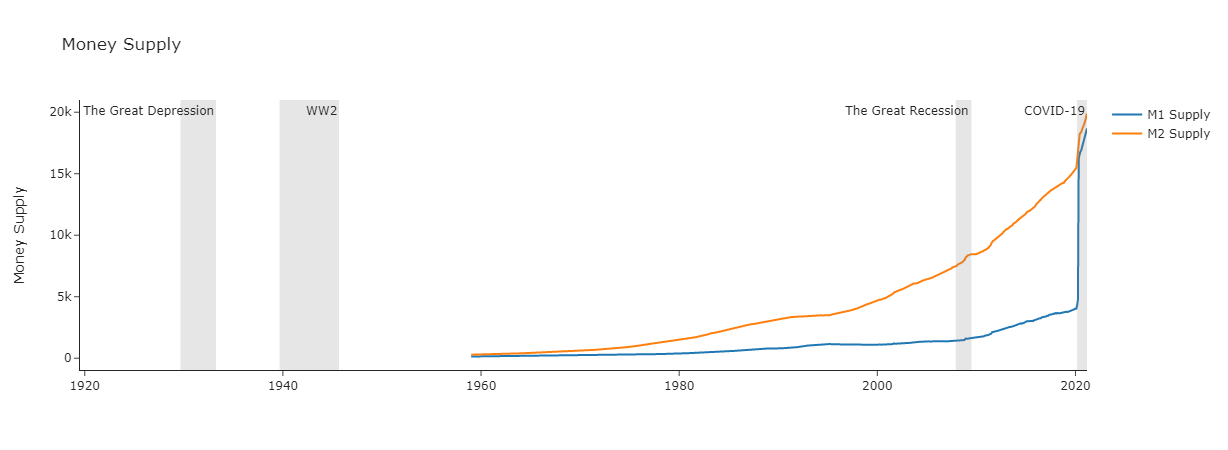

In [13]:
# Get M1 Money Supply
M_1= quandl.get("FRED/M1SL", authtoken="m6nQZWVxbd6F2y_ESnBH")
# Get M2 Money Supply
M_2= quandl.get("FRED/M2SL", authtoken="m6nQZWVxbd6F2y_ESnBH")

# Concat M1 and M2 money supply into one DataFrame
# M1 cash, coins
# M2 = M1 + savings 
M_data = pd.concat([M_1,M_2], axis='columns', join='inner')
M_data.columns=['M1','M2']
# Plot M1 and M2 Money Supply
money_supply_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Money Supply"), title = "Money Supply")
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M1"],mode='lines', name="M1 Supply"))
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M2"],mode='lines', name="M2 Supply"))
money_supply_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
money_supply_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
money_supply_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
money_supply_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

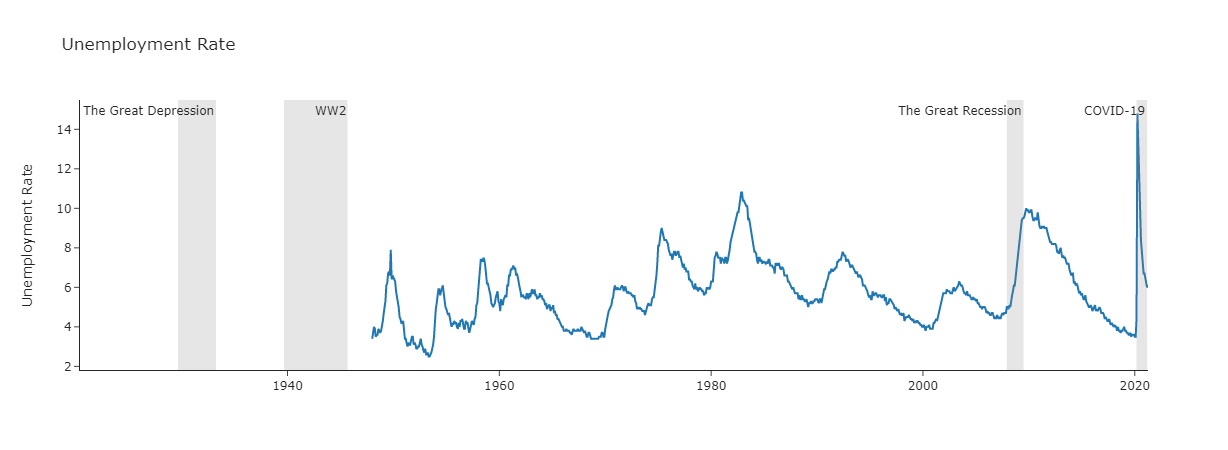

In [14]:
# Get Unemployment Rate Data and graph it
unemployment_rate = quandl.get("FRED/UNRATE", authtoken="m6nQZWVxbd6F2y_ESnBH")
unemployment_rate.columns = ["Unemployment Rate"]
unemployment_rate["Unemployment Rate"] = unemployment_rate["Unemployment Rate"]
unemployment_rate_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Unemployment Rate"), title = "Unemployment Rate")
unemployment_rate_chart.add_trace(go.Scatter(x= unemployment_rate.index, y=unemployment_rate["Unemployment Rate"],mode='lines', name="Unemployment Rate"))
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
unemployment_rate_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

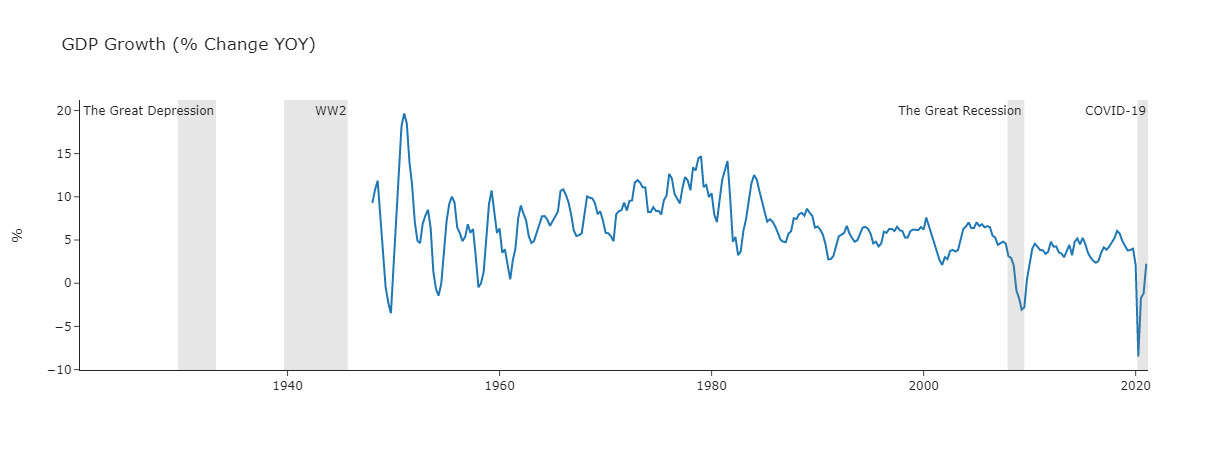

In [15]:
# plot GDP
gdp = quandl.get("FRED/GDP", authtoken="m6nQZWVxbd6F2y_ESnBH")
gdp.columns = ["GDP"]
gdp = ((gdp - gdp.shift(4))/gdp.shift(4))*100
gdp_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="%"), title = "GDP Growth (% Change YOY)")
gdp_chart.add_trace(go.Scatter(x= gdp.index, y=gdp["GDP"],mode='lines', name="Unemployment Rate"))
gdp_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
gdp_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
gdp_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
gdp_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

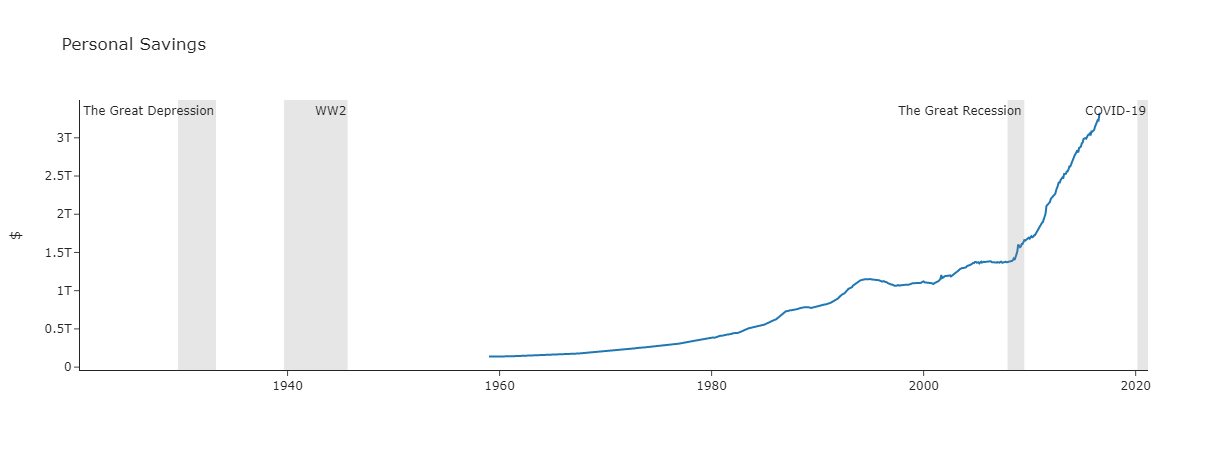

In [16]:
# Plot personal Savings
personal_savings= quandl.get("FRED/MYAGM1USM052S", authtoken="m6nQZWVxbd6F2y_ESnBH")
personal_savings.columns= ["Personal Savings"]
personal_savings_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="$"), title = "Personal Savings")
personal_savings_chart.add_trace(go.Scatter(x= personal_savings.index, y=personal_savings["Personal Savings"],mode='lines', name="Personal Savings"))
personal_savings_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
personal_savings_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
personal_savings_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
personal_savings_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

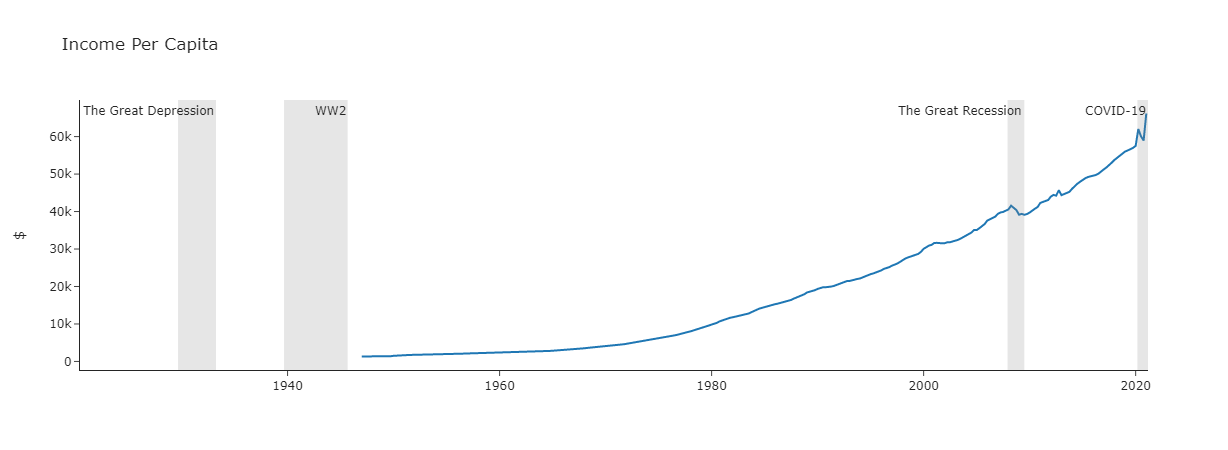

In [17]:
# Plot income per capita
income_per_capita= quandl.get("FRED/A792RC0Q052SBEA", authtoken="m6nQZWVxbd6F2y_ESnBH")
income_per_capita.columns = ["Income per Capita"]
income_per_capita_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="$"), title = "Income Per Capita")
income_per_capita_chart.add_trace(go.Scatter(x= income_per_capita.index, y=income_per_capita["Income per Capita"],mode='lines', name="Income Per Capita"))
income_per_capita_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
income_per_capita_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
income_per_capita_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
income_per_capita_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

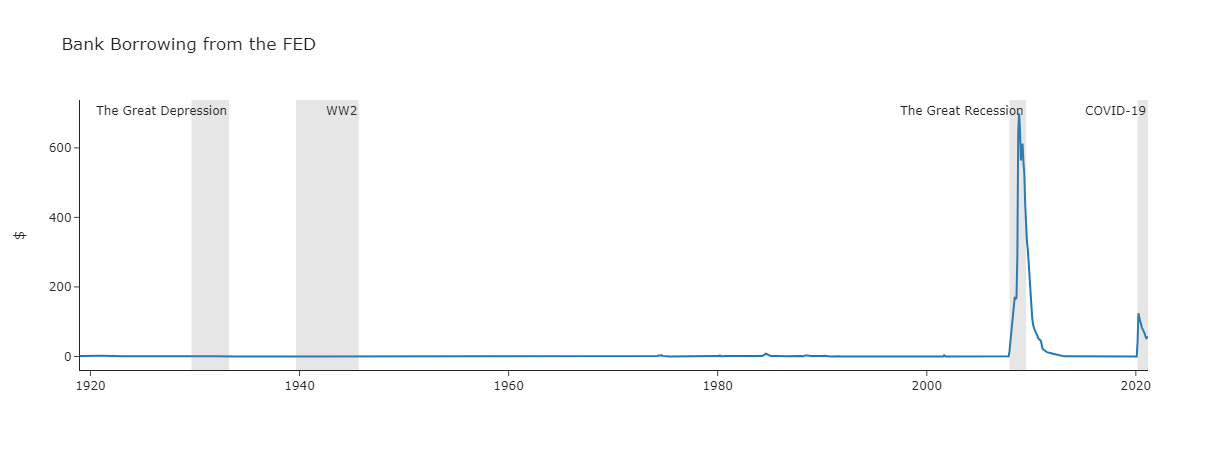

In [18]:
# Get total depository insitution borrowing from the FED
bank_borrowing = quandl.get("FRED/BORROW", authtoken="m6nQZWVxbd6F2y_ESnBH")
bank_borrowing.columns= ["Bank Borrowing from the FED"]
bank_borrowing_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="$"), title = "Bank Borrowing from the FED")
bank_borrowing_chart.add_trace(go.Scatter(x= bank_borrowing.index, y=bank_borrowing["Bank Borrowing from the FED"],mode='lines', name="Bank Borrowing from the FED"))
bank_borrowing_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
bank_borrowing_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
bank_borrowing_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
bank_borrowing_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

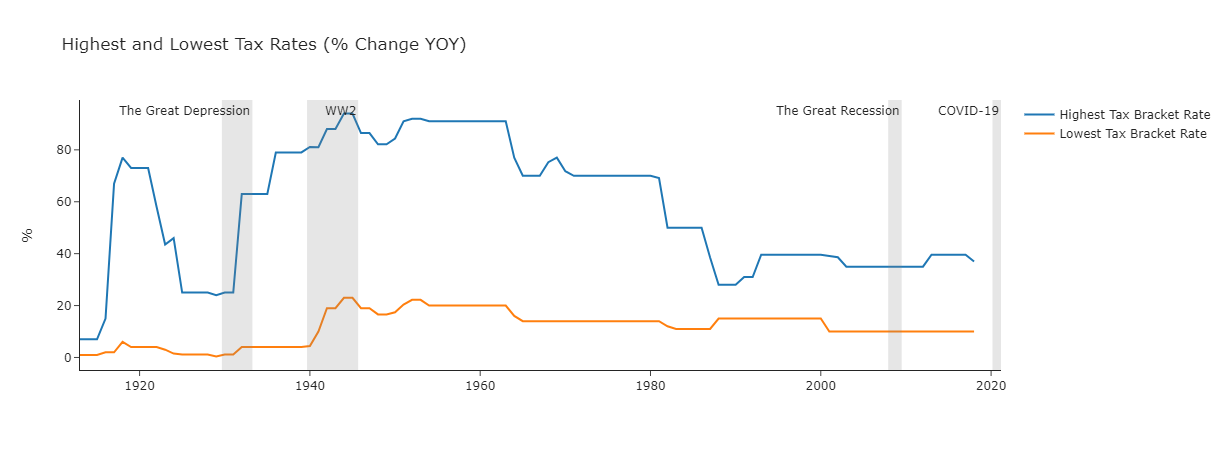

In [19]:
# Get Tax Rate info 
fred = Fred(api_key='5e69ae6a604885b4df0c139c4644453c')
tax_rates_highest_bracket = fred.get_series_latest_release('IITTRHB')
tax_rates_highest_bracket.dropna()
highest_bracket = pd.DataFrame(tax_rates_highest_bracket)
highest_bracket.columns=['percent']



tax_rates_lowest_bracket = fred.get_series_latest_release('IITTRLB')
tax_rates_lowest_bracket.dropna()
lowest_bracket = pd.DataFrame(tax_rates_lowest_bracket)
lowest_bracket.columns=['percent']


tax_combined= pd.concat([highest_bracket, lowest_bracket], axis='columns', join='inner')
tax_combined.columns=['Highest Percent','Lowest Percent']


tax_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="%"), title = "Highest and Lowest Tax Rates (% Change YOY)")
tax_chart.add_trace(go.Scatter(x= tax_combined.index, y=tax_combined["Highest Percent"],mode='lines', name="Highest Tax Bracket Rate"))
tax_chart.add_trace(go.Scatter(x= tax_combined.index, y=tax_combined["Lowest Percent"],mode='lines', name="Lowest Tax Bracket Rate"))
tax_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
tax_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
tax_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
tax_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

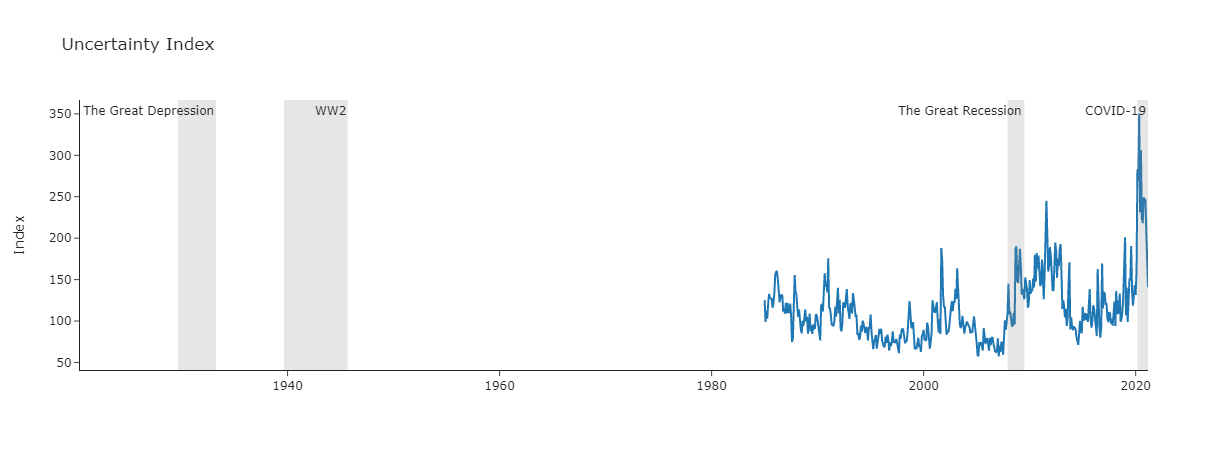

In [20]:
# Get uncertainty Index info
uncertainty_index = quandl.get("FRED/USEPUINDXM", authtoken="m6nQZWVxbd6F2y_ESnBH")
uncertainty_index.columns= ["Uncertainty Index"]
uncertainty_index_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Index"), title = "Uncertainty Index")
uncertainty_index_chart.add_trace(go.Scatter(x= uncertainty_index.index, y=uncertainty_index["Uncertainty Index"],mode='lines', name="Uncertainty Index"))
uncertainty_index_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
uncertainty_index_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
uncertainty_index_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
uncertainty_index_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

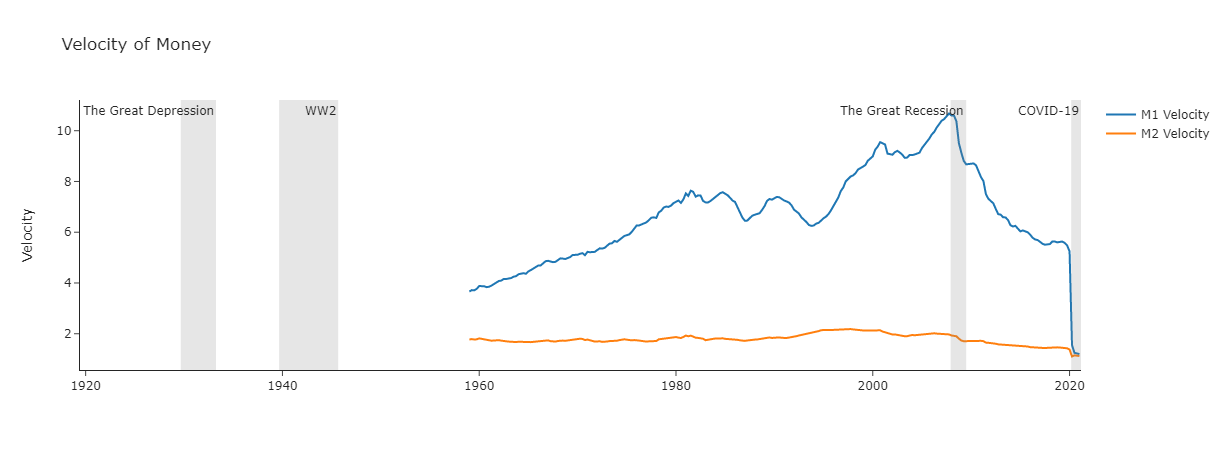

In [21]:
# Get the velocity of money
velocity_m1v = quandl.get("FRED/M1V")
velocity_m2v = quandl.get("FRED/M2V")

velocity_combined_df = pd.concat([velocity_m1v, velocity_m2v], join = "inner", axis = "columns")
velocity_combined_df.columns = ["M1 Velocity", "M2 Velocity"]
velocity_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Velocity"), title = "Velocity of Money")
velocity_chart.add_trace(go.Scatter(x= velocity_combined_df.index, y=velocity_combined_df["M1 Velocity"],mode='lines', name="M1 Velocity"))
velocity_chart.add_trace(go.Scatter(x= velocity_combined_df.index, y=velocity_combined_df["M2 Velocity"],mode='lines', name="M2 Velocity"))
velocity_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-04-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
velocity_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-09-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-09-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
velocity_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-12-01'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-07-01'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
velocity_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-03-01'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")


In [28]:
# Put parallel plots in a single row
row_inflate_money_supply = pn.Row(inflation_rates_chart, money_supply_chart)

In [29]:
# Put bar plots in row
unemployment_gdp = pn.Row(unemployment_rate_chart)
unemployment_gdp.append(gdp_chart)

In [30]:
# Insert row_of_parallel and row_of_Bar into a column object with Markdown text
plots_all = pn.Column(
    "# Allegheny Real Estate Dashboard", row_inflate_money_supply ,unemployment_gdp
)

In [32]:
# Create tabs
tabs = pn.Tabs(
    ("All Plots", plots_all),
    ("Unemployment", unemployment_gdp),
    ("Inflation", row_inflate_money_supply)
)
tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1883-03-...})
            [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1899-05-...})
        [2] Row
            [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1903-08-...})
            [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1903-08-...})
    [1] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1903-08-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1903-08-...})
    [2] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1883-03-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1899-05-...})